# Intro
Scale Normalization을 적용해서.. DCGAN을 학습시킨것.. 테스트

더 많은 LC GT 데이터에 대해서 수행

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [2]:
# real correspondence list  (dist: 0 ~ 1)
real_corr_list = [[350, 1398], [351, 1399], [352, 1400], [353, 1401], [354, 1402], [355, 1403], [386, 1444], [390, 1448], [392, 1450], [393, 1451], [394, 1452], [395, 1453], [396, 1454], [399, 1459], [400, 1460], [401, 1461], [525, 1601], [526, 1602], [526, 1604], [527, 1603], [527, 1605], [528, 1604], [528, 1606], [529, 1605], [529, 1607], [530, 1606], [530, 1608], [531, 1607], [531, 1609], [532, 1608], [532, 1610], [533, 1609], [533, 1611], [534, 1612], [535, 1611], [535, 1613], [536, 1612], [536, 1614], [537, 1613], [537, 1615], [538, 1616], [539, 1615], [539, 1617], [540, 1616], [540, 1618], [541, 1617], [541, 1619], [542, 1618], [542, 1620], [543, 1619], [544, 1620], [545, 1621], [547, 1623], [569, 1647], [570, 1648], [701, 1769], [703, 1771], [705, 1773], [749, 1819], [938, 2016], [939, 2017], [940, 2018], [941, 2019], [942, 2020], [943, 2021], [944, 2022], [945, 2023], [946, 2024], [947, 2025], [948, 2026], [949, 2027], [950, 2028], [951, 2029], [952, 2030], [953, 2031], [954, 2032], [955, 2033], [956, 2034], [957, 2035], [958, 2036], [959, 2037], [960, 2038], [961, 2039], [962, 2040], [963, 2041], [964, 2042], [964, 2044], [965, 2043], [966, 2044], [977, 2055], [978, 2056], [984, 2062], [985, 2063], [986, 2064], [987, 2065], [988, 2066], [989, 2067], [990, 2068], [991, 2069], [992, 2070], [993, 2071], [994, 2072], [995, 2073], [996, 2074], [997, 2075], [1001, 2079], [1002, 2080], [1003, 2081], [1004, 2082], [1005, 2083], [1071, 2147], [1072, 2148], [1073, 2149], [1148, 2222], [1204, 2282], [1205, 2283], [1206, 2284], [1207, 2285], [1216, 2294], [1224, 2302], [1225, 2303], [1226, 2304], [1227, 2305], [1228, 2306], [1228, 2308], [1229, 2307], [1229, 2309], [1230, 2308], [1230, 2310], [1231, 2309], [1231, 2311], [1232, 2310], [1233, 2313], [1241, 2319], [1242, 2320], [1243, 2321], [1244, 2322], [1245, 2323], [1246, 2324], [1247, 2325], [1248, 2326], [1249, 2327], [1273, 2353], [1274, 2354], [1275, 2355], [1276, 2356], [1282, 2360], [1283, 2361], [1284, 2362], [1285, 2363], [1286, 2364], [1287, 2365], [1288, 2366], [1289, 2367], [1290, 2368], [1291, 2369], [1296, 2374], [1299, 2377], [1300, 2378], [1301, 2379], [1302, 2378], [1302, 2380], [1303, 2379], [1303, 2381], [1304, 2380], [1304, 2382], [1305, 2381], [1305, 2383], [1306, 2382], [1340, 2422], [1341, 2423], [1342, 2422], [1342, 2424], [1343, 2423], [1345, 2425], [1346, 2426], [1348, 2428]]

In [3]:
# import shutil
# Manual_LC_dataset = np.unique(np.array(real_corr_list).flatten())
# for idx in Manual_LC_dataset:
#     src = "/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre/images/%04d.jpg" % idx
#     dst = "/media/dongwonshin/Ubuntu Data/Datasets/FAB-MAP/Image Data/City Centre ManualLC/images/"
#     shutil.copy(src,dst)

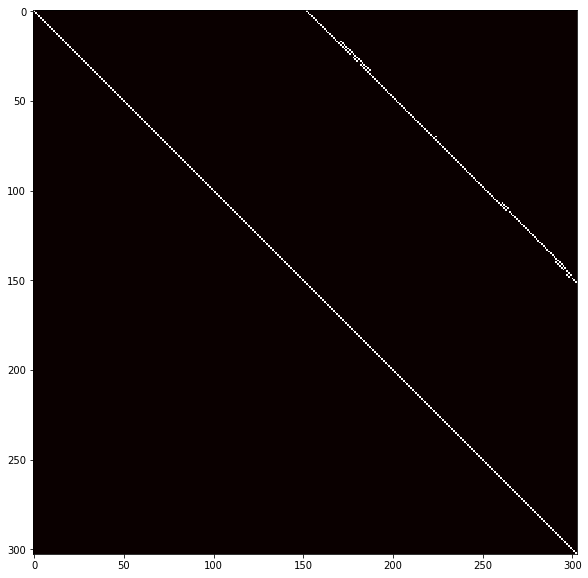

In [4]:
image_idx_order = []
with open("/home/dongwonshin/Desktop/DBoW2/build/DCGAN_image_order.txt") as fp:
    for l in fp:
        idx = l.split('.')[0].split('/')[-1]
        image_idx_order.append(int(idx))

GT_corr_mat = np.zeros((len(image_idx_order),len(image_idx_order)))

for a, i in enumerate(image_idx_order):
    for b, j in enumerate(image_idx_order):
        if i==j:
            GT_corr_mat[a,b] = 1
        if [i,j] in real_corr_list:
            GT_corr_mat[a,b] = 1


plt.figure(figsize=(10,10))
plt.imshow(GT_corr_mat, cmap = 'hot')
plt.show()

In [5]:
def PrecisionRecalCurve(GT_corr_mat, esti_corr_mat):

    precision, recall, _ = precision_recall_curve(GT_corr_mat.flatten(), esti_corr_mat.flatten())
    average_precision = average_precision_score(GT_corr_mat.flatten(), esti_corr_mat.flatten())

    # Plot Precision-Recall curve
    plt.clf()
    plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
    plt.legend(loc="lower left")
    plt.show()

# Proposed method

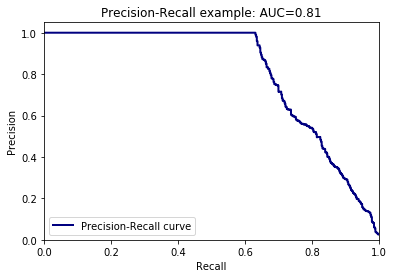

In [10]:
# L2_Norm
prop_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/DCGAN_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, prop_esti_corr_mat)

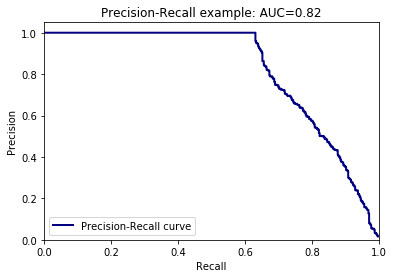

In [21]:
# L1_Norm
prop_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/DCGAN_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, prop_esti_corr_mat)

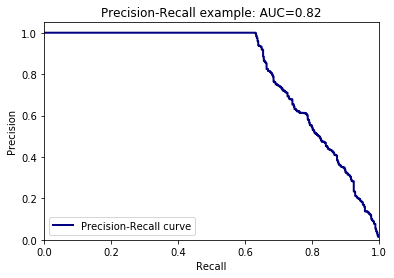

In [22]:
# BHATTACHARYYA
prop_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/DCGAN_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, prop_esti_corr_mat)

# SURF

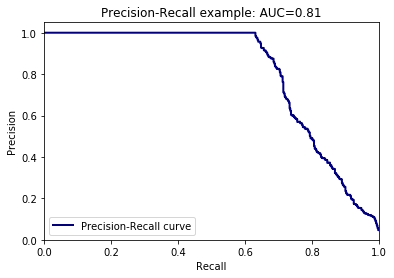

In [14]:
# SURF/ param = 300
surf_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/SURF_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, surf_esti_corr_mat)

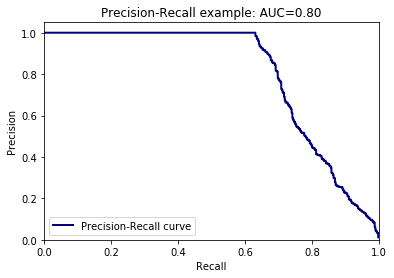

In [17]:
# SURF/ param = 1000
surf_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/SURF_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, surf_esti_corr_mat)

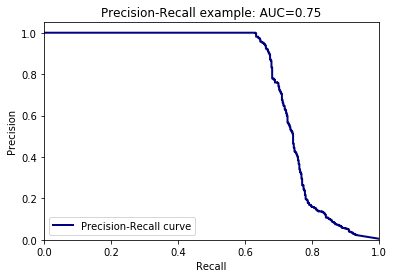

In [18]:
# SURF/ param = 10000
surf_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/SURF_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, surf_esti_corr_mat)

# ORB

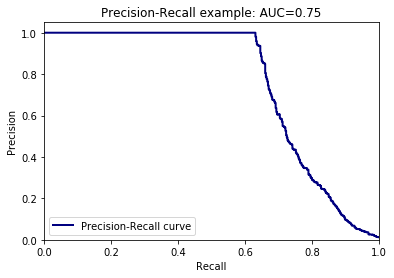

In [15]:
# ORB
orb_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBow3/build/orb_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, orb_esti_corr_mat)

# BRISK

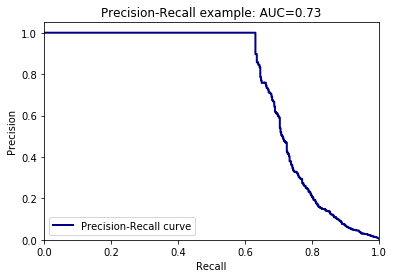

In [9]:
# BRISK
brisk_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBow3/build/brisk_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, brisk_esti_corr_mat)

# Concl
1미터 늘려서 Manual로 얻은 GT 데이터에 대해서도!
제안하는 방법이 더 좋다!
오예!

그렇다면
윈도우에서 FV, VLAD에 대해서도 비교를 해보는것을 하기로.
그리고 딥러닝을 이용한 방법도 하나 구현해서.. 비교해보기..